This notebook demonstrates the usage of the pyliger functions of running GO enrichment analysis.

In [2]:
# Please load following modules
import os
import pyliger

1. We use the same data as used in [GOATOOLS tutorial](https://github.com/tanghaibao/goatools/blob/main/notebooks/goea_nbt3102.ipynb). It is from a 2014 Nature paper:
[Computational analysis of cell-to-cell heterogeneity in single-cell RNA-sequencing data reveals hidden subpopulations of cells](https://www.nature.com/articles/nbt.3102#methods)

In [1]:
from genes_ncbi_10090_proteincoding import GENEID2NT as GeneID2nt_mus
# Data will be stored in this variable

geneid2symbol = {}
# Get xlsx filename where data is stored
ROOT = os.path.dirname(os.getcwd()) # go up 1 level from current working directory
din_xlsx = os.path.join(ROOT, "nbt.3102-S4_GeneIDs.xlsx")
# Read data
if os.path.isfile(din_xlsx):  
    import xlrd
    book = xlrd.open_workbook(din_xlsx)
    pg = book.sheet_by_index(0)
    for r in range(pg.nrows):
        symbol, geneid, pval = [pg.cell_value(r, c) for c in range(pg.ncols)]
        if geneid:
            geneid2symbol[int(geneid)] = symbol
    print('{N} genes READ: {XLSX}'.format(N=len(geneid2symbol), XLSX=din_xlsx))
else:
    raise RuntimeError('FILE NOT FOUND: {XLSX}'.format(XLSX=din_xlsx))
gene_list = list(geneid2symbol.keys())
background = list(GeneID2nt_mus.keys())

400 genes READ: /Users/lulu/Documents/GitHub/nbt.3102-S4_GeneIDs.xlsx


`run_GO_analysis` requires three inputs: 1. a list of study genes; 2. a list of background genes; 3. data source (currently, PyLiger supports two data sources - human or mouse).

In [4]:
goea_results_all = pyliger.run_GO_analysis(gene_list, background, data_source='mouse')
goea_results_sig = [r for r in goea_results_all if r.p_fdr_bh < 0.05]

  EXISTS: results/go-basic.obo
  EXISTS: results/gene2go
results/go-basic.obo: fmt(1.2) rel(2021-10-26) 47,197 GO Terms
HMS:0:00:05.308820 415,347 annotations, 30,016 genes, 18,751 GOs, 1 taxids READ: results/gene2go 

Load BP Gene Ontology Analysis ...
fisher module not installed.  Falling back on scipy.stats.fisher_exact
 67% 17,578 of 26,368 population items found in association

Load CC Gene Ontology Analysis ...
fisher module not installed.  Falling back on scipy.stats.fisher_exact
 71% 18,655 of 26,368 population items found in association

Load MF Gene Ontology Analysis ...
fisher module not installed.  Falling back on scipy.stats.fisher_exact
 65% 17,009 of 26,368 population items found in association

Run BP Gene Ontology Analysis: current study set of 400 IDs ... 95%    361 of    381 study items found in association
 95%    381 of    400 study items found in population(26368)
Calculating 12,527 uncorrected p-values using fisher_scipy_stats
  12,527 GO terms are associated wit

In [5]:
pyliger.plot_go_term(goea_results_sig, '.', palette='viridis')

Starting calculations

Calculating biological process
Output for biological processfound in: ./biological_process_..png

Calculating molecular function
Output for molecular functionfound in: ./molecular_function_..png

Calculating cellular component
Output for cellular componentfound in: ./cellular_component_..png
Finished!


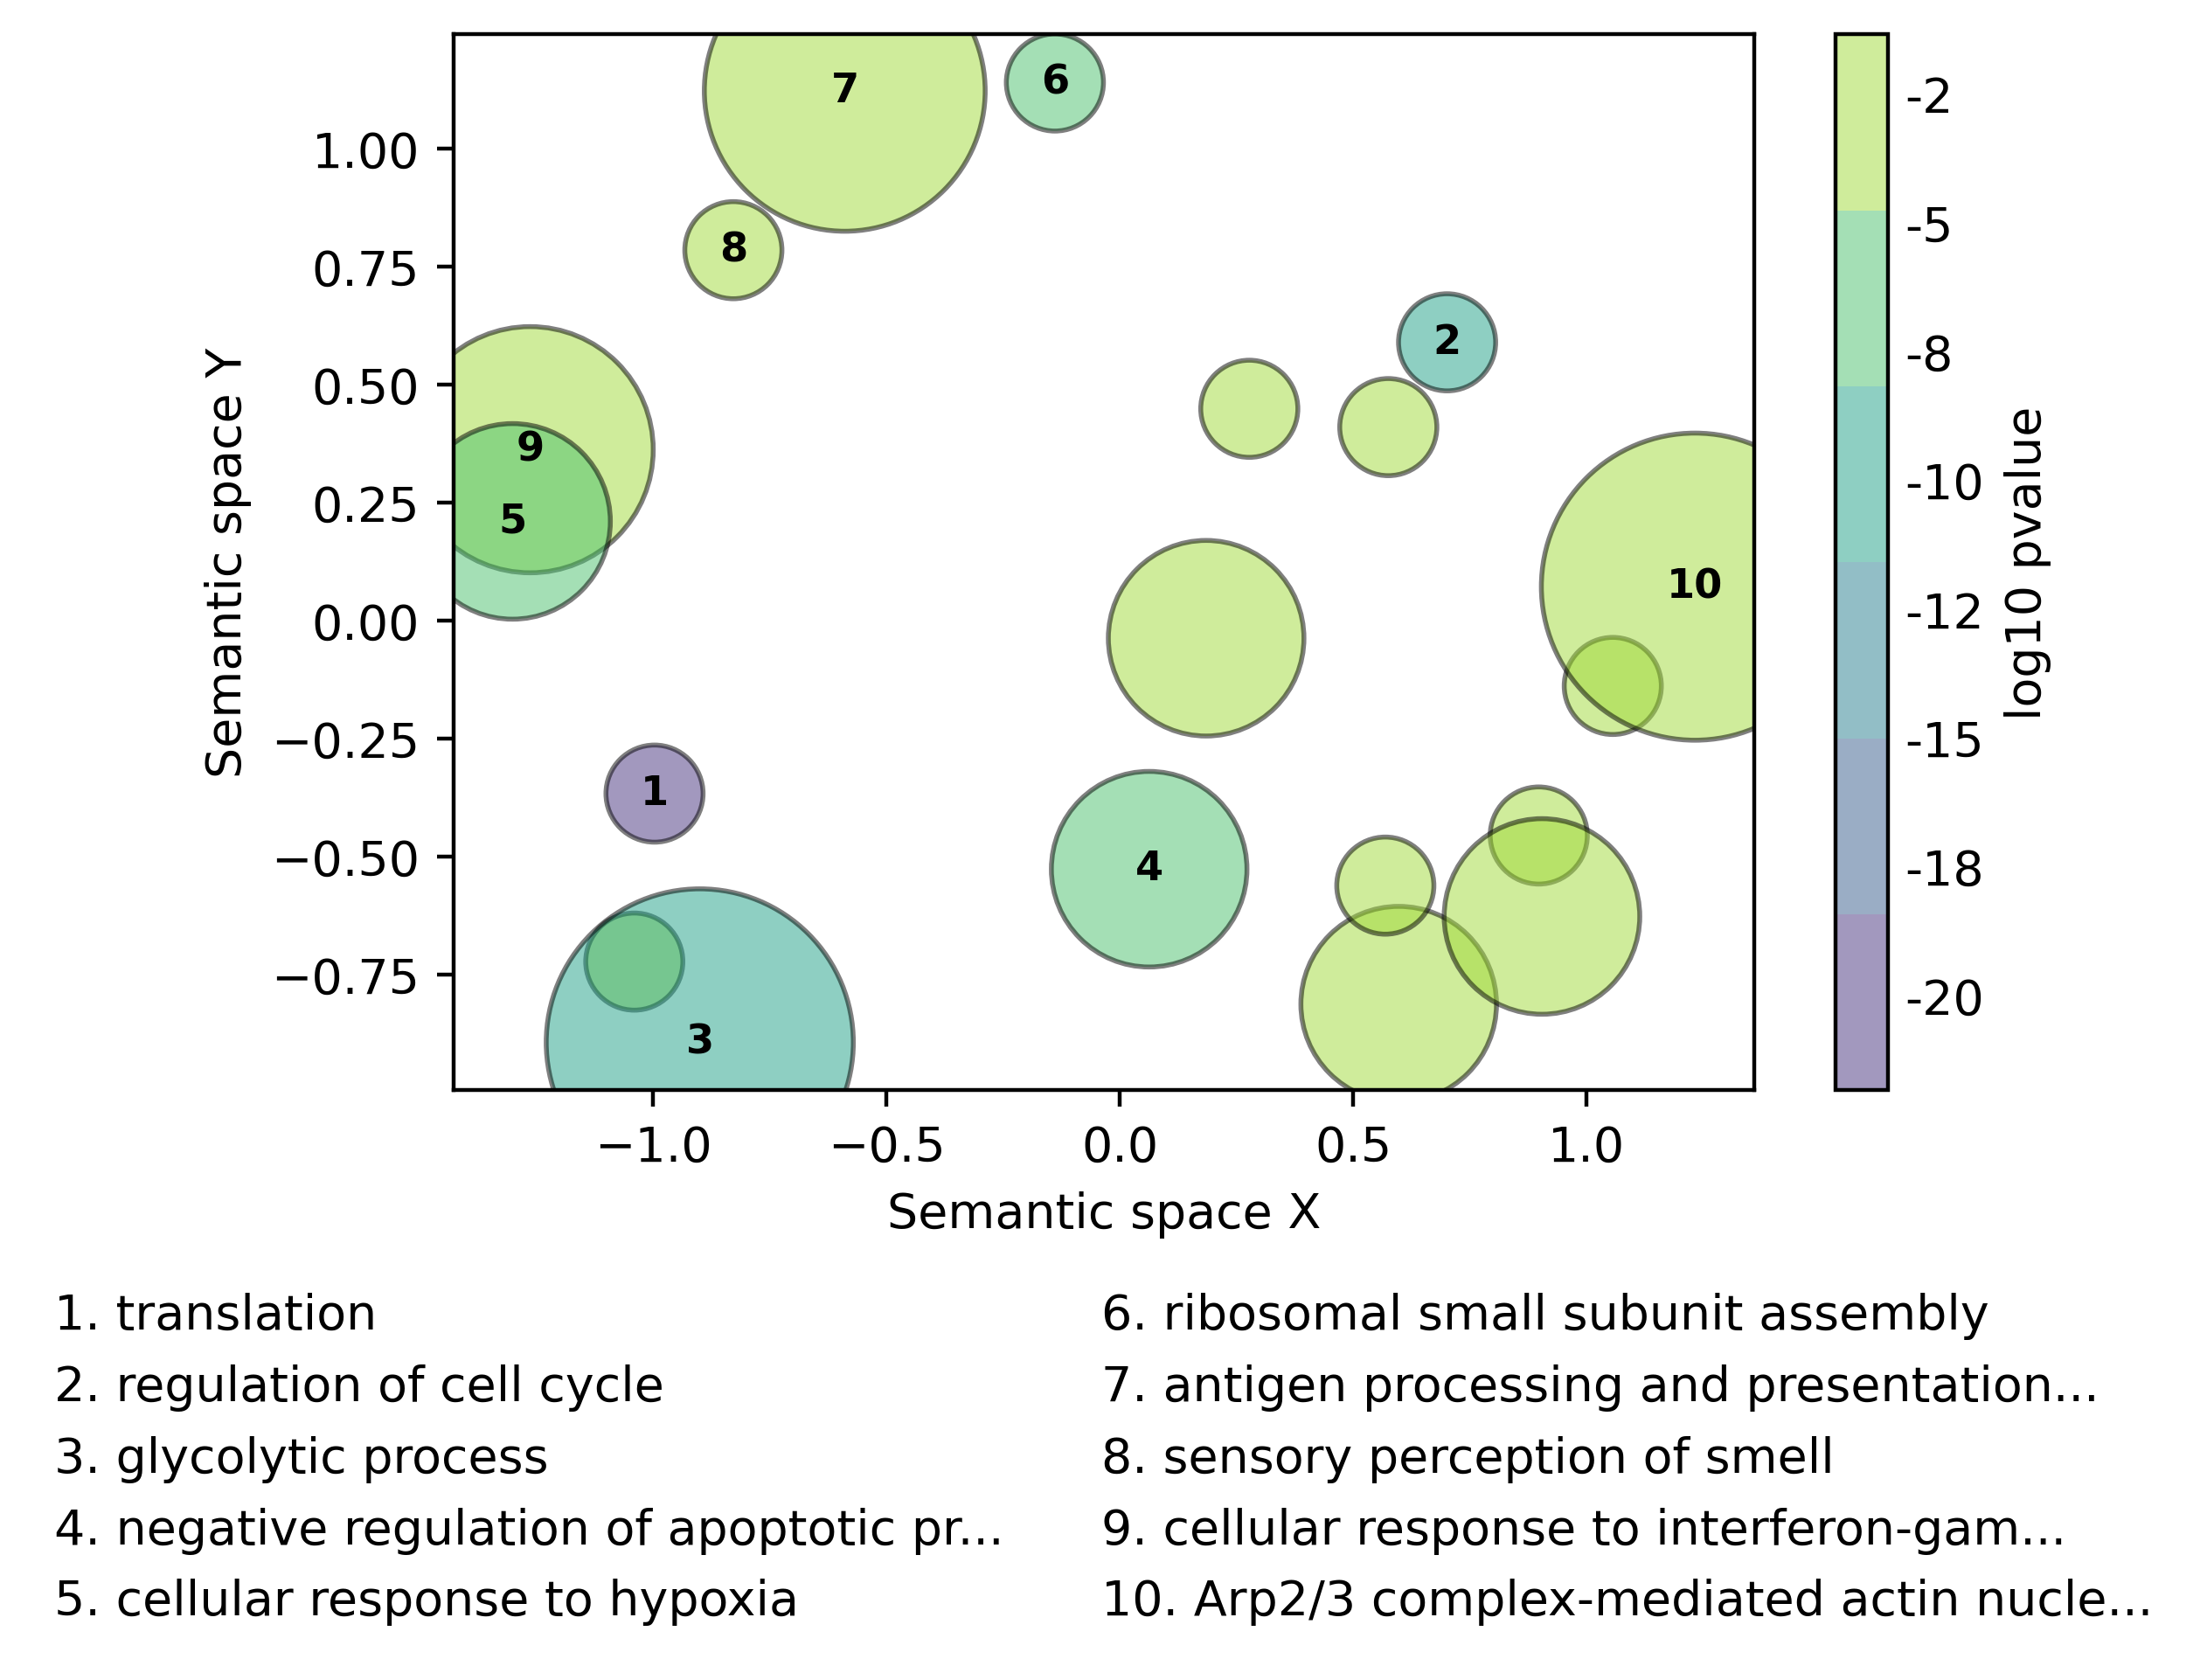

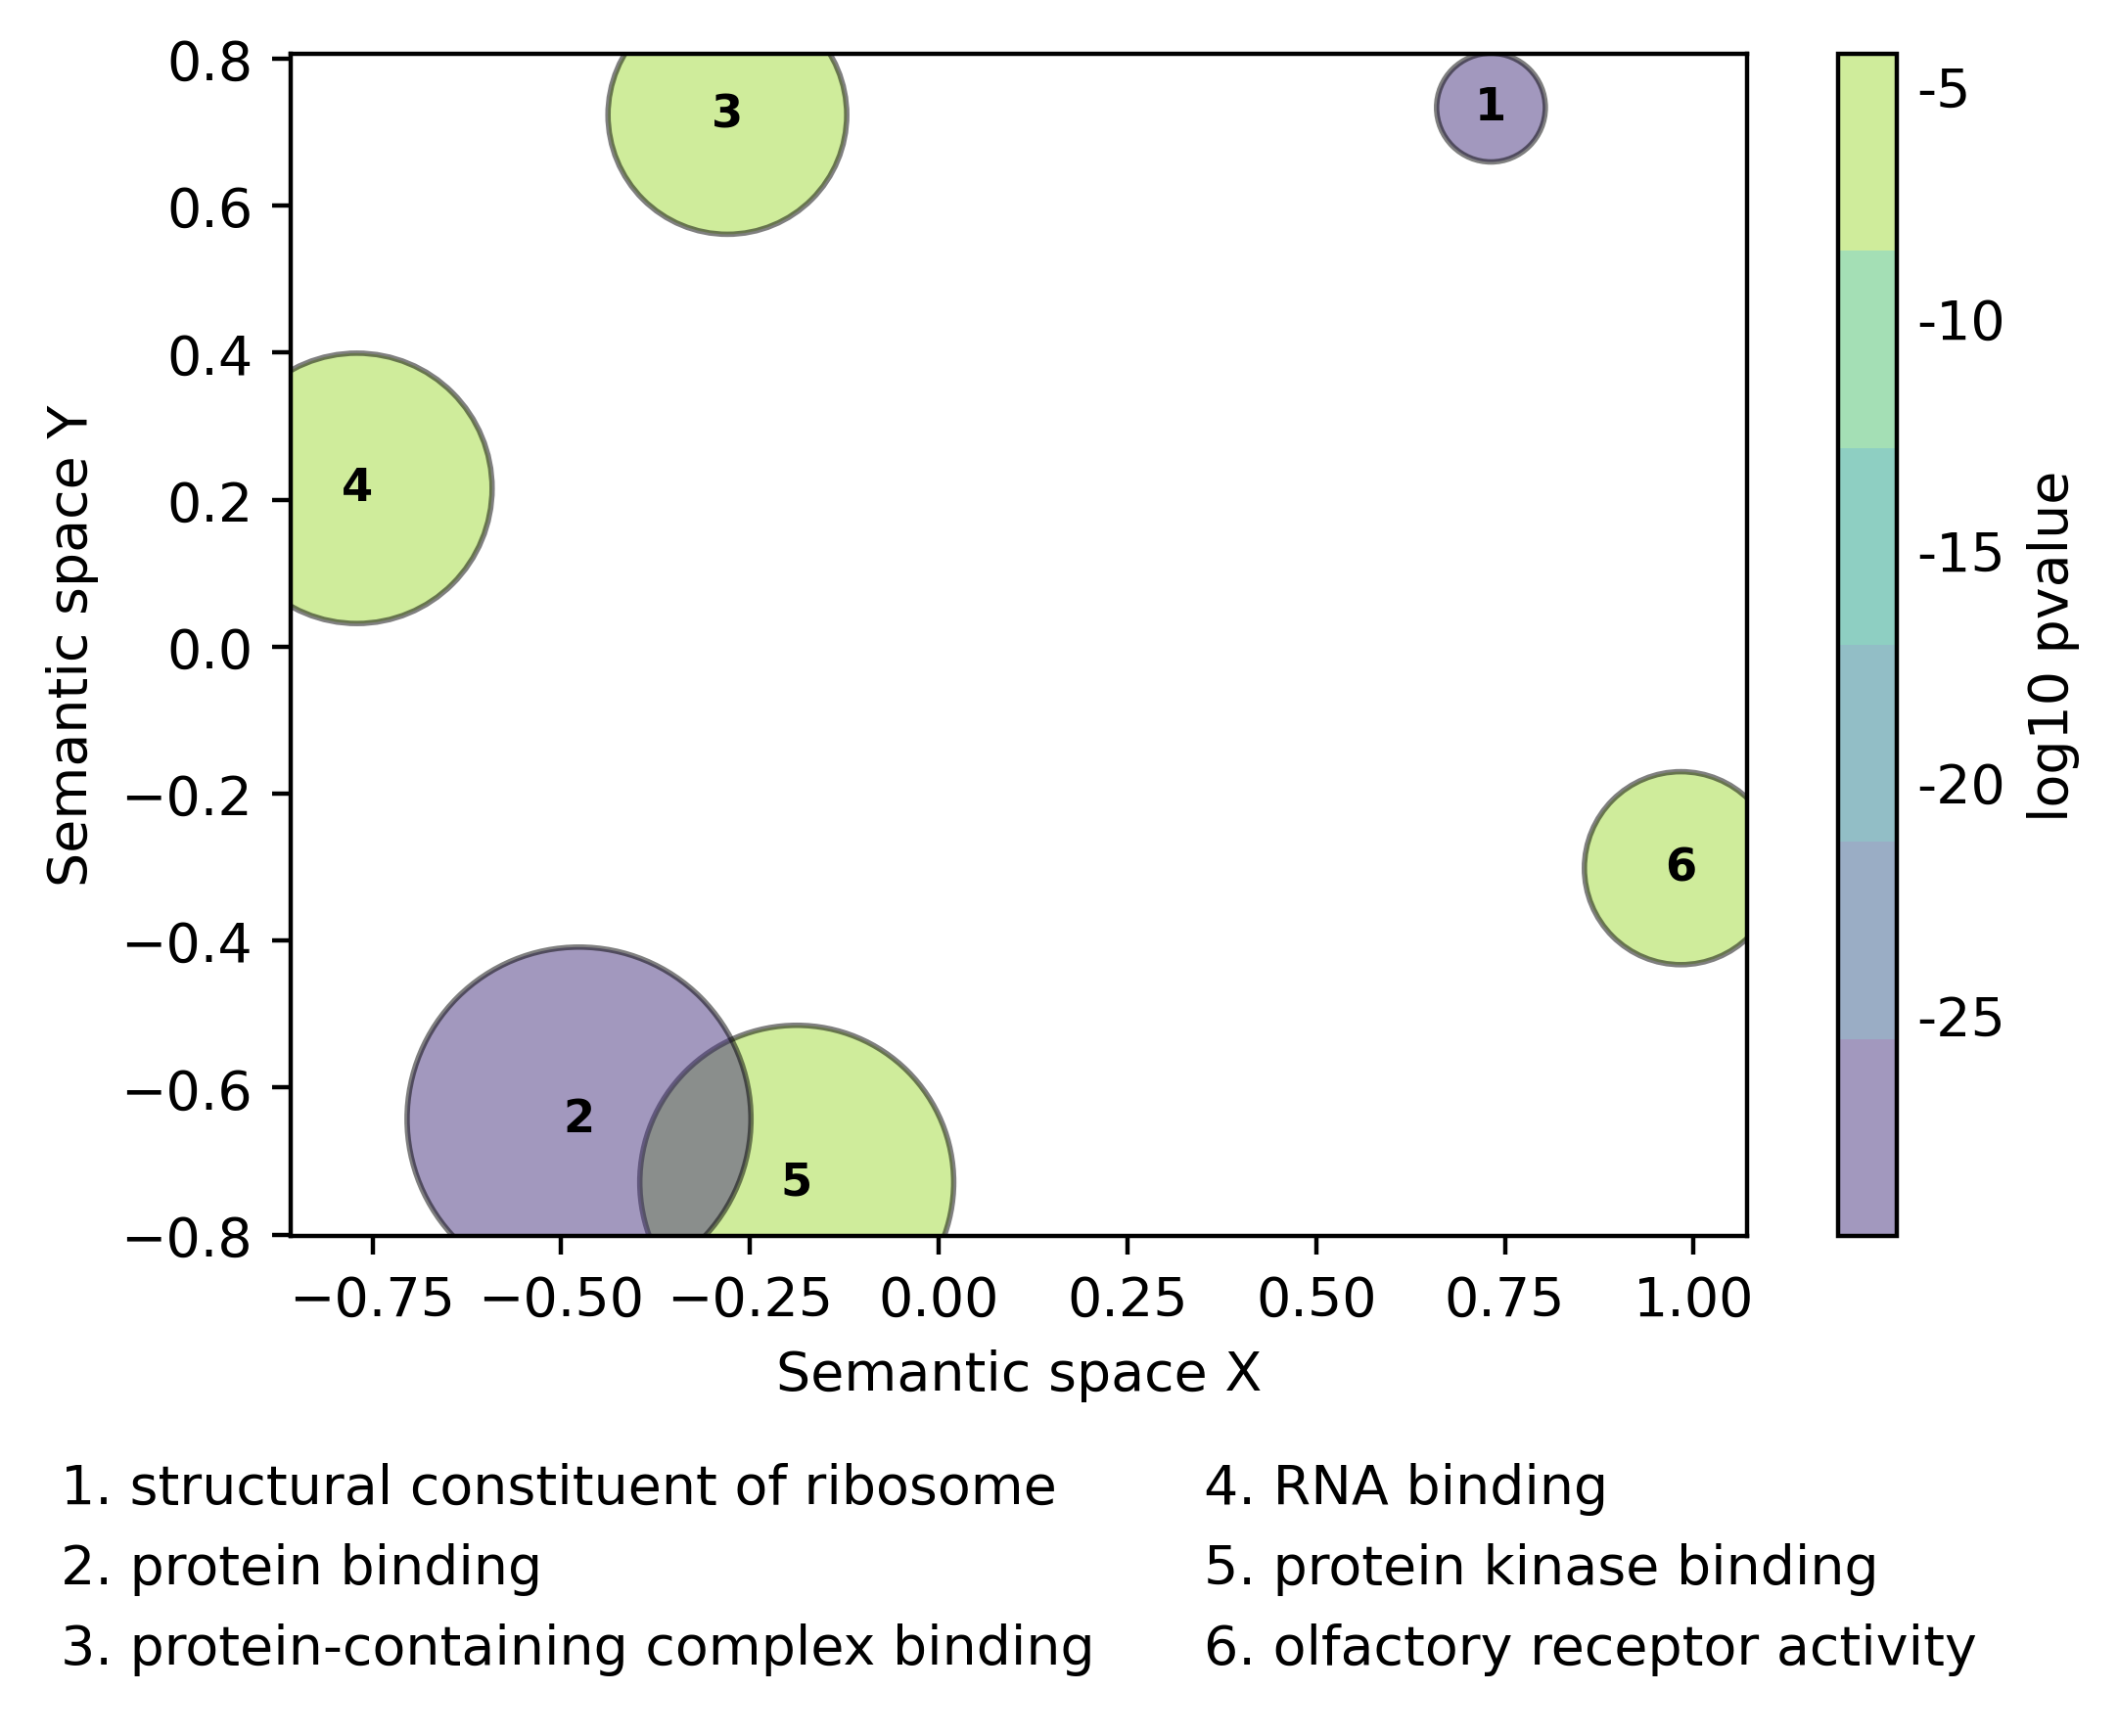

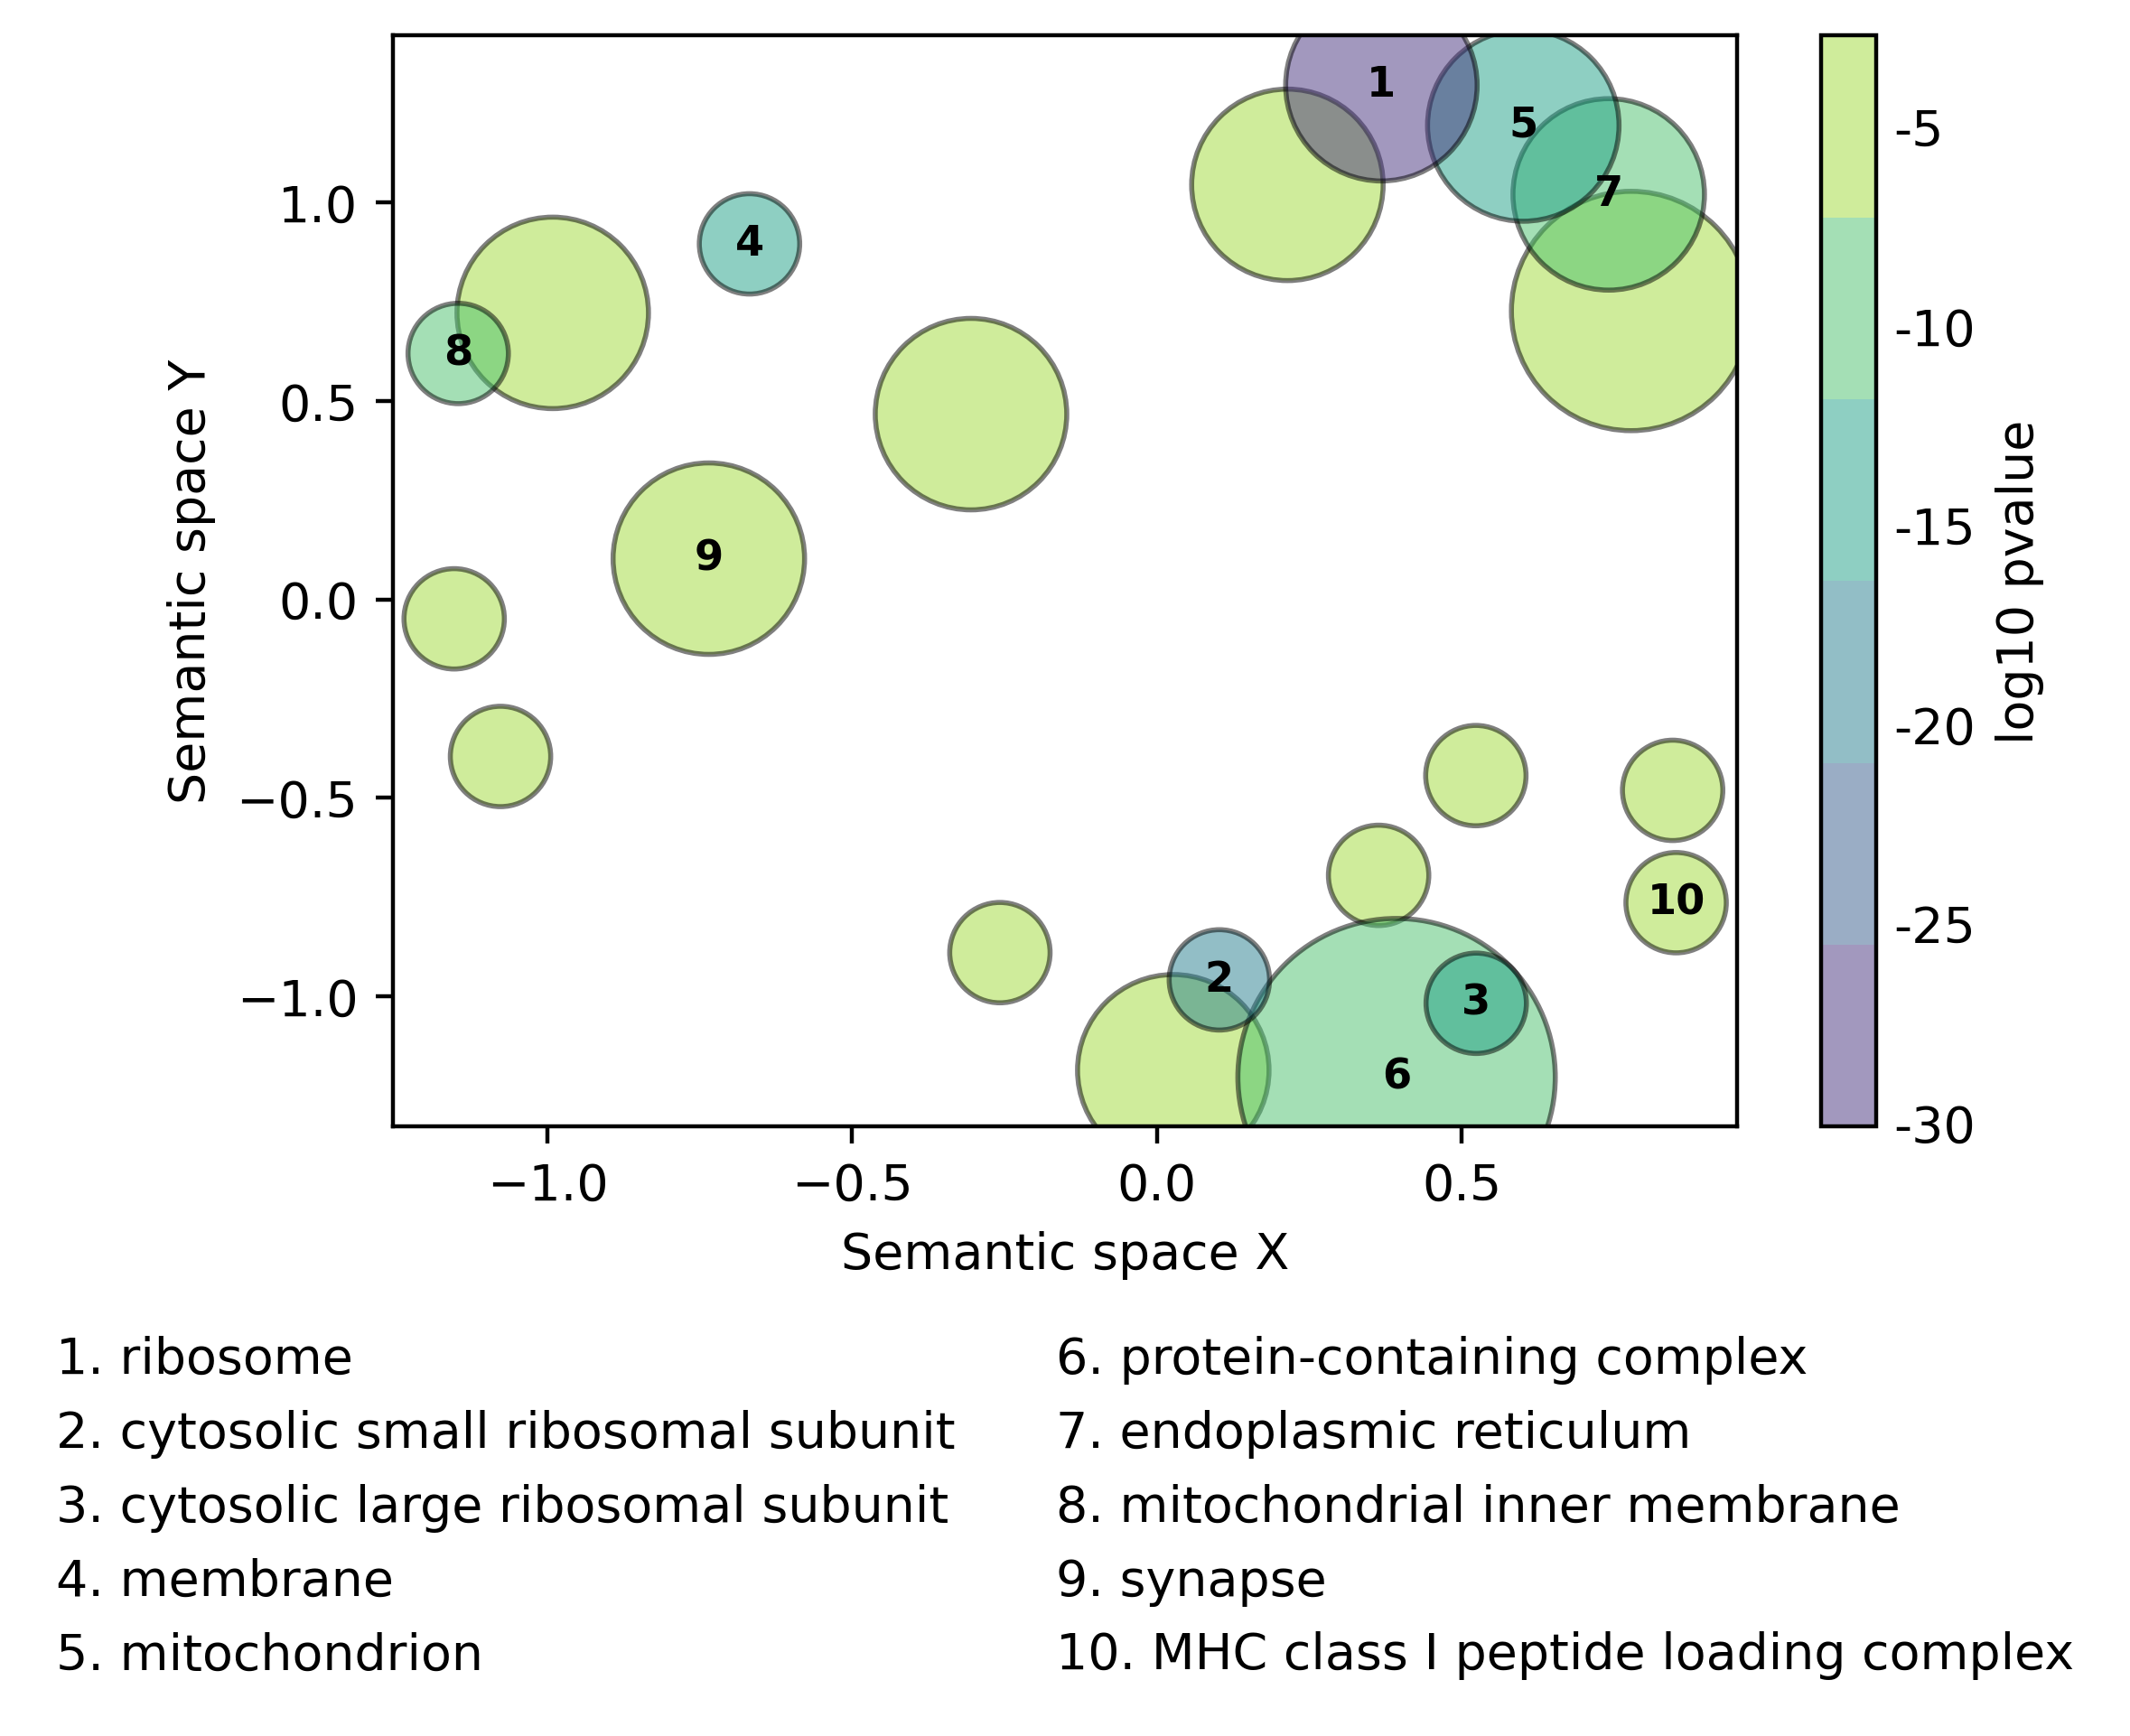